<a href="https://colab.research.google.com/github/guilhermelaviola/InterMilan/blob/main/AllPlayers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-1-88ff570e2e2d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [2]:
# Importing and displaying the last 10 goals scored:
df = pd.ExcelFile('INTER.xlsx')
players = pd.read_excel(df, 'All Players')
players.tail(10)

,Number,Continent,Nationality,Position,Player,Year joined,Club President,Manager
1168,16,Europe,Italy,Midfielder,Davide Frattesi,2023,Steven Zhang,Simone Inzaghi
1169,77,Europe,Italy,Goalkeeper,Emil Audero,2023,Steven Zhang,Simone Inzaghi
1170,30,South America,Brazil,Midfielder,Carlos Augusto,2023,Steven Zhang,Simone Inzaghi
1171,28,Europe,France,Defender,Benjamin Pavard,2023,Steven Zhang,Simone Inzaghi
1172,9,Europe,France,Attacker,Marcus Thuram,2023,Steven Zhang,Simone Inzaghi
1173,14,Europe,Netherlands,Midfielder,Davy Klaassen,2023,Steven Zhang,Simone Inzaghi
1174,7,South America,Colombia,Midfielder,Juan Cuadrado,2023,Steven Zhang,Simone Inzaghi
1175,17,North America,Canada,Midfielder,Tajon Buchanan,2023,Steven Zhang,Simone Inzaghi
1176,31,Europe,Germany,Defender,Yann Aurel Bisseck,2023,Steven Zhang,Simone Inzaghi
1177,1,Europe,Switzerland,Goalkeeper,Yann Sommer,2023,Steven Zhang,Simone Inzaghi


In [3]:
# Displaying the number of rows and columns in the dataset:
players.shape

(1178, 8)

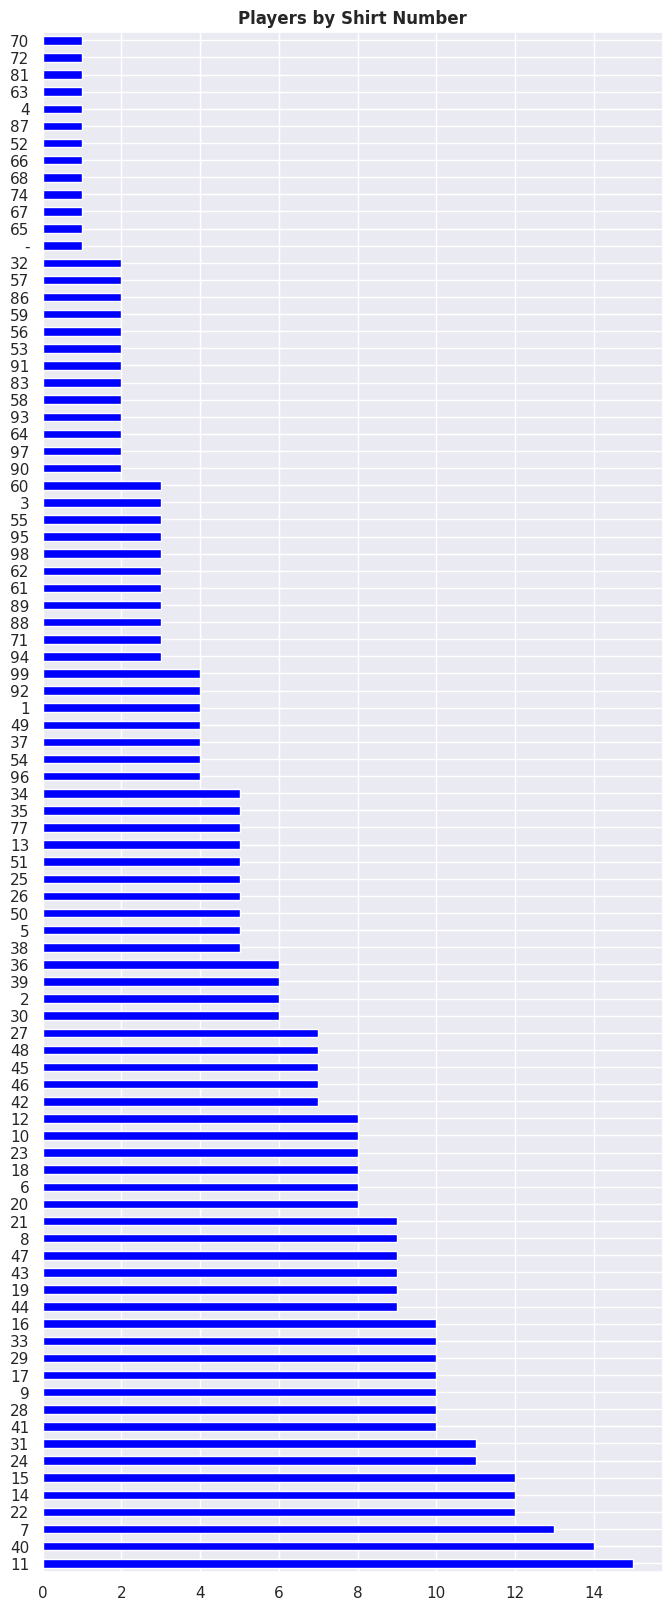

In [4]:
# Displaying players by shirt number:
players['Number'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 20))
plt.ylabel(None)
plt.title('Players by Shirt Number', fontweight = 'bold')
plt.show()

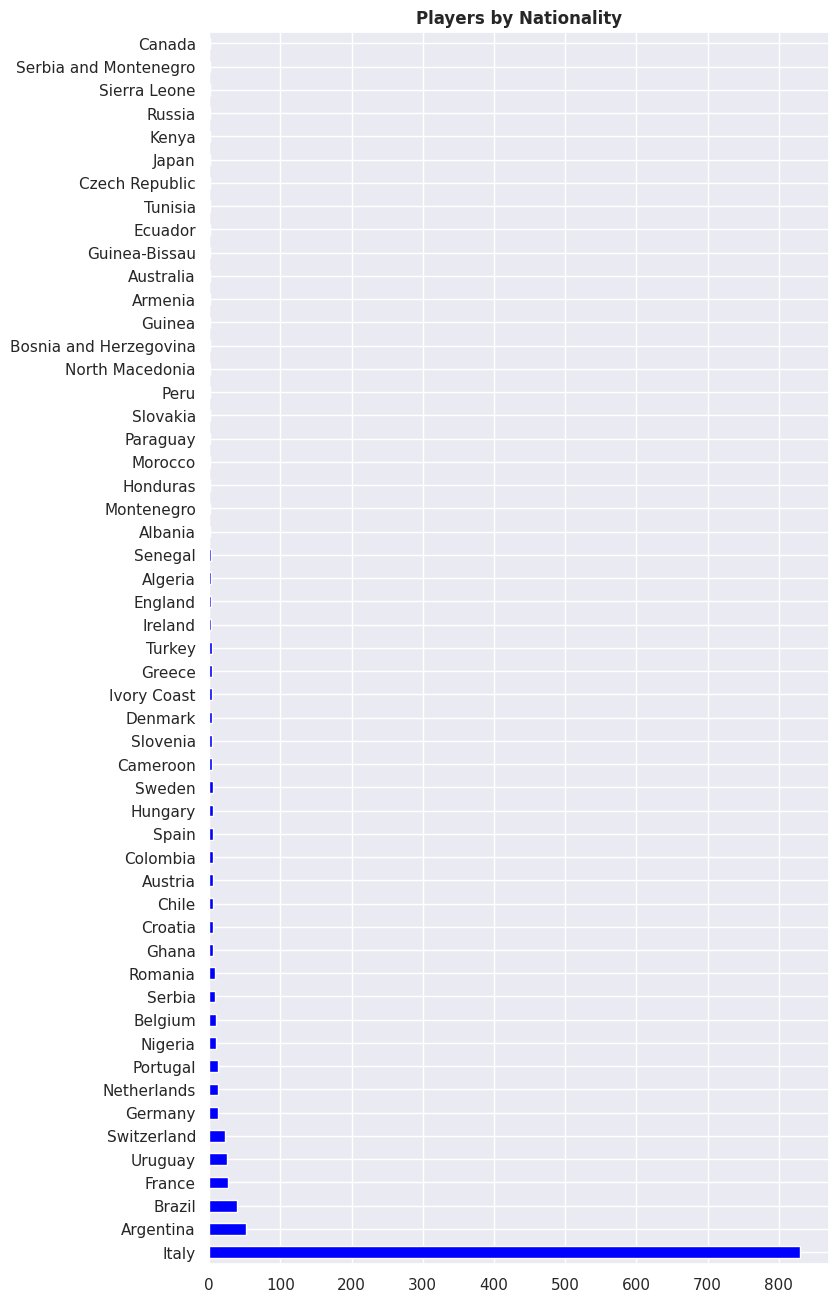

In [6]:
# Displaying players by nationality:
players['Nationality'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 16))
plt.ylabel(None)
plt.title('Players by Nationality', fontweight = 'bold')
plt.show()

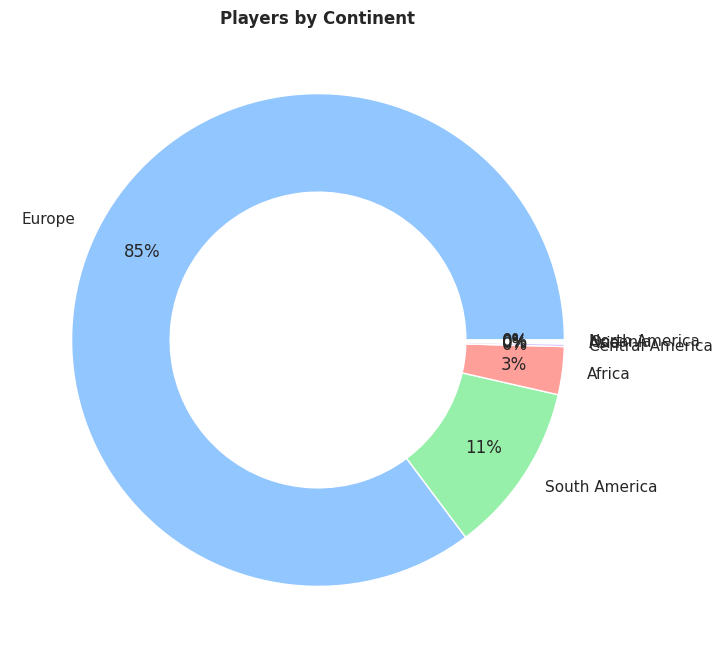

In [7]:
# Displaying players by continent:
players['Continent'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Players by Continent', fontweight = 'bold')
plt.show()

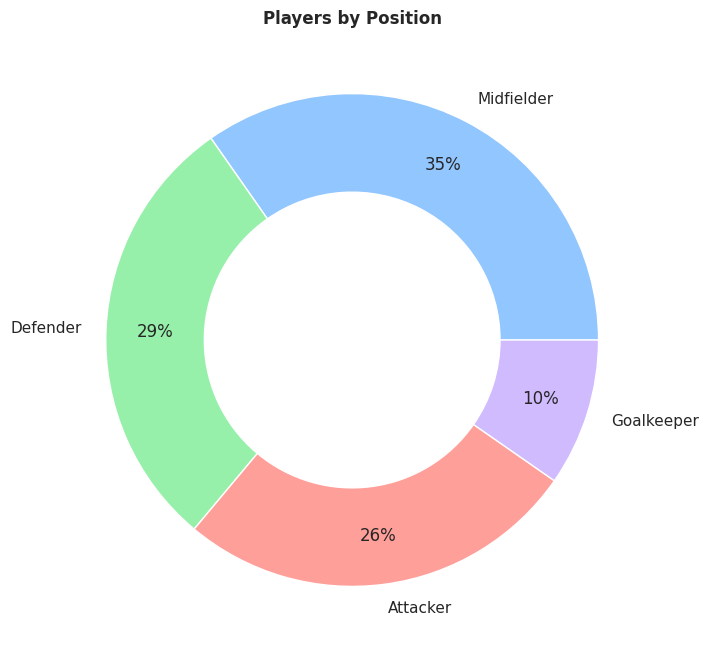

In [8]:
# Displaying players by position:
players['Position'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Players by Position', fontweight = 'bold')
plt.show()

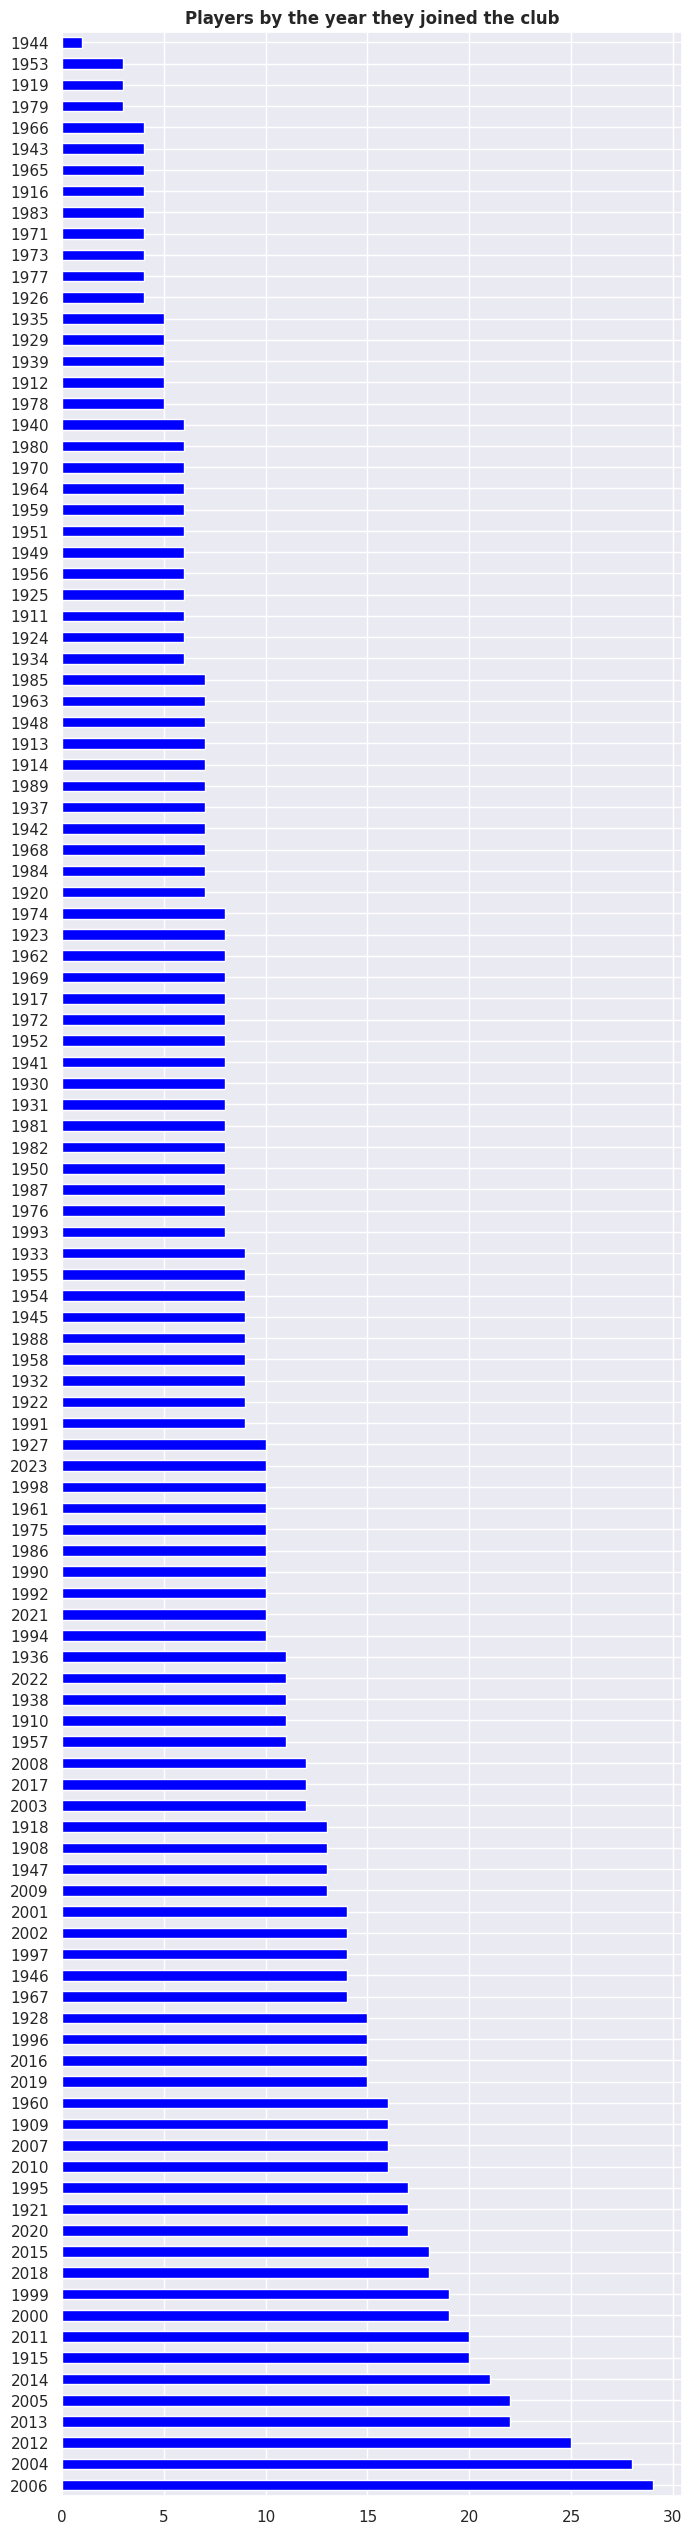

In [9]:
# Displaying players by the year they joined the club:
players['Year joined'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 32))
plt.ylabel(None)
plt.title('Players by the year they joined the club', fontweight = 'bold')
plt.show()

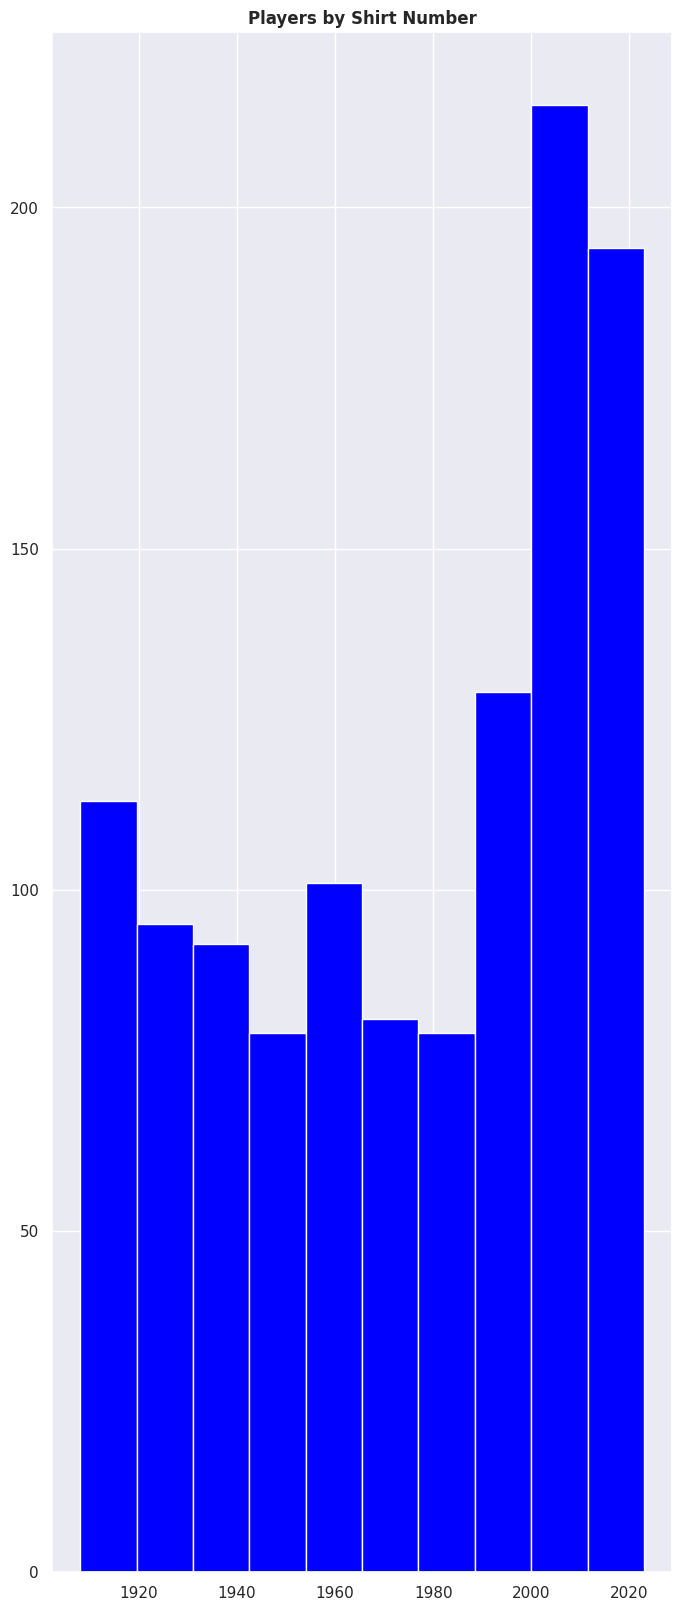

In [10]:
# Displaying players by shirt number:
players['Year joined'].plot(kind = 'hist', color = 'blue', figsize = (8, 20))
plt.ylabel(None)
plt.title('Players by Shirt Number', fontweight = 'bold')
plt.show()

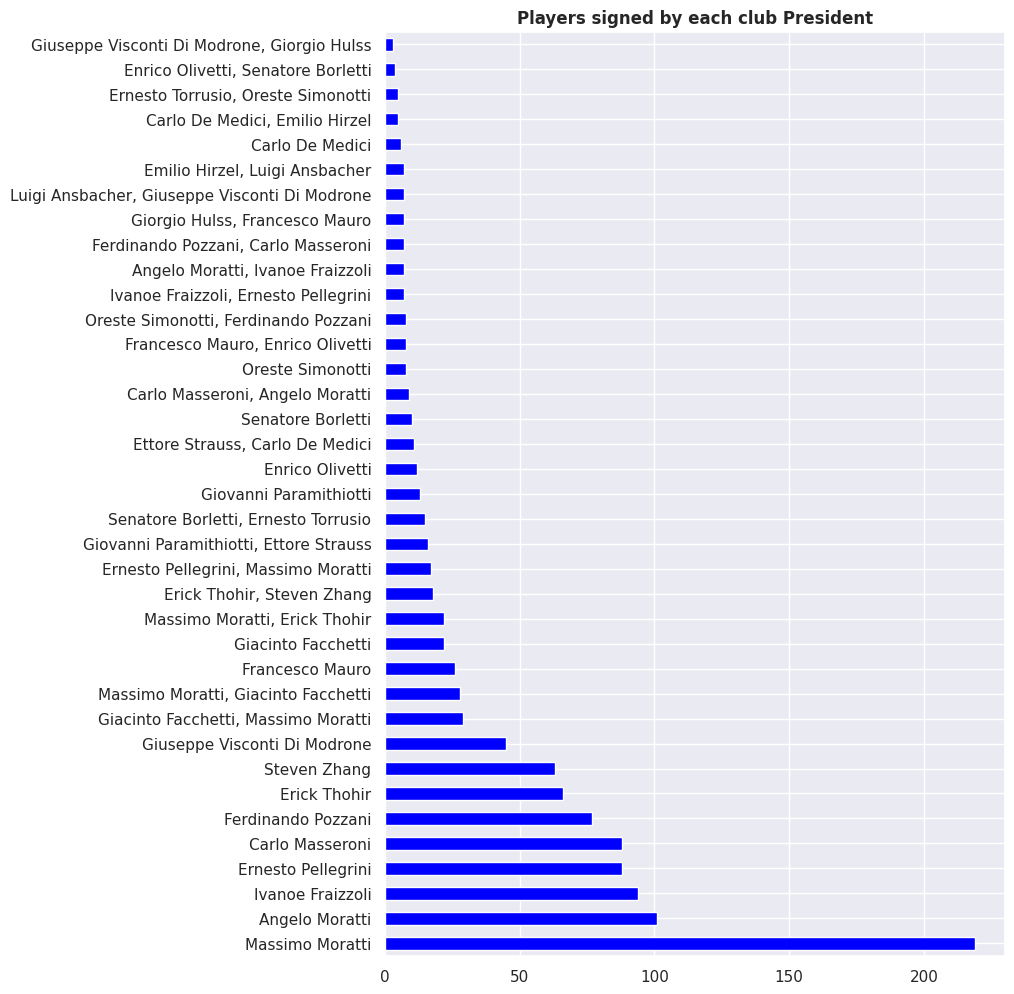

In [11]:
# Displaying players who were signed by each club president:
players['Club President'].value_counts(normalize=False, sort=True, ascending=False).plot(kind = 'barh', color = 'blue', figsize = (8, 12))
plt.ylabel(None)
plt.title('Players signed by each club President', fontweight = 'bold')
plt.show()

In [20]:
players['Club President'] = players['Club President'].astype(str)

# Splitting the managers names by comma and removing leading spaces:
players['Club President'] = players['Club President'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
players = players.explode('Club President')

# Counting Matrix using crosstab method:
president_counts = pd.crosstab(index = players.index, columns = players['Club President'], margins = False).to_dict('index')
president_counts = pd.DataFrame(president_counts)

# Counting the number of 0s and 1s in each row:
counts = (president_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [21]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

                              False  True
Angelo Moratti                 1061    59
Carlo De Medici                1156    22
Carlo Masseroni                1074    51
Emilio Hirzel                  1166    12
Enrico Olivetti                1154    14
Erick Thohir                   1072    36
Ernesto Pellegrini             1066    58
Ernesto Torrusio               1158     0
Ettore Strauss                 1151    27
Ferdinando Pozzani             1086    26
Francesco Mauro                1137    41
Giacinto Facchetti             1099    51
Giorgio Hulss                  1168    10
Giovanni Paramithiotti         1149    29
Giuseppe Visconti Di Modrone   1123    55
Ivanoe Fraizzoli               1070    54
Luigi Ansbacher                1164    14
Massimo Moratti                 863    87
Oreste Simonotti               1157     8
Senatore Borletti              1149    10
Steven Zhang                   1097    56


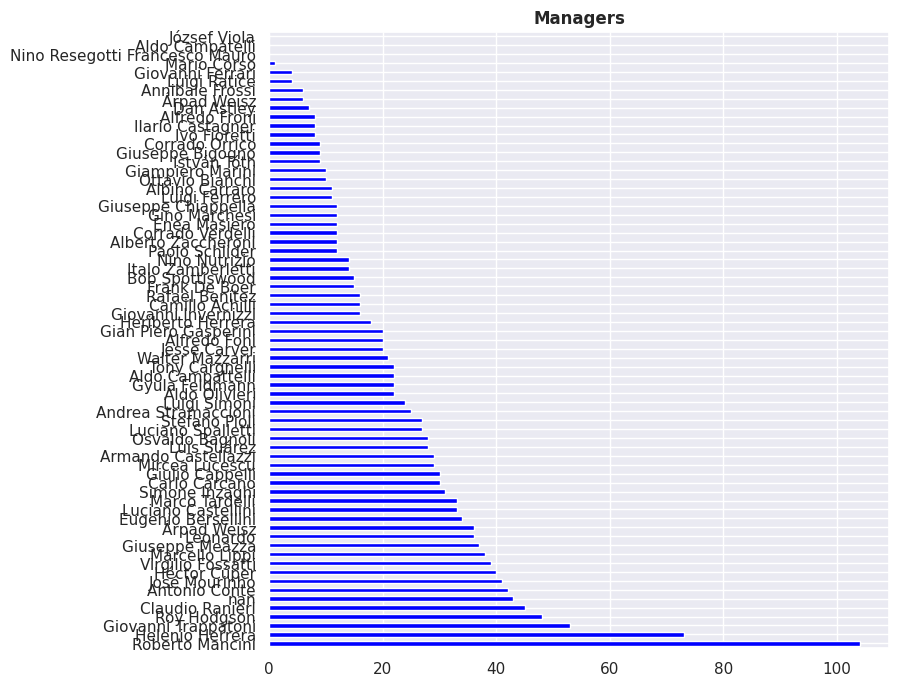

In [30]:
# Displaying the count of Inter presidents in office by season:
counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'blue', figsize = (8, 8))
plt.ylabel(None)
plt.title('Managers', fontweight = 'bold')
plt.show()

In [24]:
players['Manager'] = players['Manager'].astype(str)

# Splitting the managers names by comma and removing leading spaces:
players['Manager'] = players['Manager'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
players = players.explode('Manager')

# Counting Matrix using crosstab method:
manager_counts = pd.crosstab(index = players.index, columns = players['Manager'], margins = False).to_dict('index')
manager_counts = pd.DataFrame(manager_counts)

# Counting the number of 0s and 1s in each row:
counts = (manager_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [25]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

                    False  True
Alberto Zaccheroni   1138    12
Albino Carraro       1167    11
Aldo Campatelli      1169     0
Aldo Campattelli     1156    22
Aldo Olivieri        1156    22
...                   ...   ...
Virgilio Fossatti    1093    39
Walter Mazzarri      1135    21
nan                  1135    43
Árpad Weisz          1172     6
Árpád Weisz          1110    36

[69 rows x 2 columns]


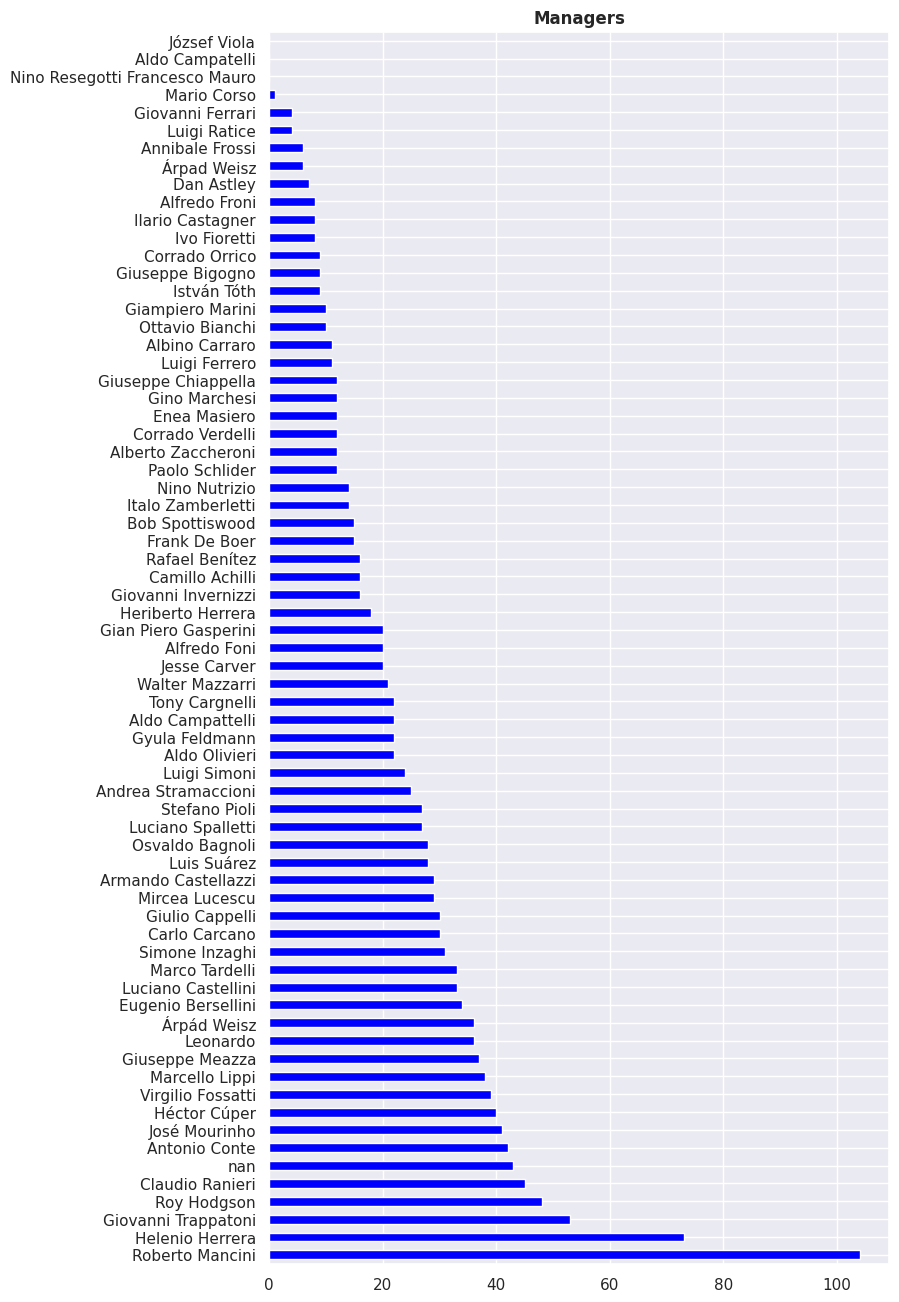

In [29]:
# Displaying the count of Inter managers by season:
counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'blue', figsize = (8, 16))
plt.ylabel(None)
plt.title('Managers', fontweight = 'bold')
plt.show()